# Golf Card Game Statistics Analysis
This is a tool used to 

In [1]:
#point_values = {}
#discard = []
#me = []
#you = []

def prob2_same(c):
    if c in unknowns:
        if unknowns.count(c) >= 2:
            return (unknowns.count(c)-1)/(len(unknowns)-1)
    return 0

def prob(c):
    #print('prob ',c)
    #print('c in unknowns ',(c in unknowns))
    if c in unknowns:
        #print('There are ',unknowns.count(c),' in the unknowns of ',len(unknowns))
        return unknowns.count(c)/len(unknowns)
    return 0

def prob_diff(c,without):
    new_unknowns = remove_values_from_list(unknowns,without)
    if c in new_unknowns:
        #print('There are ',unknowns.count(c),' in the unknowns of ',len(unknowns))
        return new_unknowns.count(c)/len(new_unknowns)
    return 0

def prob2_all():
    #print('prob2_all')
    return_val = 0
    for c in point_values.keys():
        return_val += prob(c)*prob2_same(c)
    return return_val

def score(c):
    #print('score')
    return point_values[c]

def remove_values_from_list(the_list, val):
    #print('remove_values_from_list')
    return [value for value in the_list if value != val]
    
def get_mean(arr):
    #print('get_mean')
    tot = 0
    for c in arr:
        tot += score(c)
    return tot/len(arr)


def get_prob_both_same(col):
    #print('get_prob_both_same')
    c1 = col[0]
    c2 = col[1]
    if c1 != '?' and c2 != '?':
        if c1 == c2:
            return 1
    elif c1 != '?':
        return prob(c1)
    elif c2 != '?':
        return prob(c2)
    elif c1 == '?' and c2 == '?':
        return prob2_all()
    return 0


def get_not_same_scores(col):
    #print('get_not_same_scores')
    return_val = []
    c1 = col[0]
    c2 = col[1]
    if c1 != '?' and c2 != '?':
        return_val.append({
            'score': score(c1)+score(c2),
            'prob': 1
        })
    elif c1 != '?':
        for c_2 in point_values.keys():
            if c1 != c_2:
                return_val.append({
                    'score': score(c1)+score(c_2),
                    'prob': prob_diff(c_2,c1)
                })
    elif c2 != '?':
        for c_1 in point_values.keys():
            if c2 != c_1:
                return_val.append({
                    'score': score(c2)+score(c_1),
                    'prob': prob_diff(c_1,c2)
                })
    elif c1 == '?' and c2 == '?':
        for c_1 in point_values.keys():
            for c_2 in point_values.keys():
                if c_1 != c_2:
                    return_val.append({
                        'score': score(c_1)+score(c_2),
                        'prob': prob(c_1)*prob_diff(c_2,c_1)
                    })
    return consolidate_scores(return_val)

def get_prob_both_w(col):
    #print('get_prob_both_w')
    c1 = col[0]
    c2 = col[1]
    if c1 == '?' and c2 == '?':
        return prob('W')*prob2_same('w')
    if c1 == 'W' and c2 == 'W':
        return 1
    elif (c1 == 'W' and c2 == '?') or (c2 == 'W' and c1 == '?'):
        return prob('W')
    return 0

def consolidate_scores(scores):
    return_val = []
    for s in scores:
        exists = False
        for r in return_val:
            if r['score'] == s['score']:
                exists = True
                r['prob'] += s['prob']
        if exists == False and s['prob']>0:
            return_val.append({
                'score': s['score'],
                'prob': s['prob']
            })
    return validate(return_val)

def validate(scores):
    tot_prob = 0
    for s in scores:
        tot_prob += s['prob']
    if tot_prob < 0.98 or tot_prob > 1.02:
       print('validation error ',tot_prob)
    return scores

def get_col_scores(col):
    #print('get_col_scores')
    return_val = []
    prob_both_same = get_prob_both_same(col)
    #print('prob_both_same ',prob_both_same)
    prob_both_w = get_prob_both_w(col)
    #print('prob_both_w ',prob_both_w)
    if prob_both_same*prob_both_w > 0:
        return_val.append({
            'score': -4,
            'prob': prob_both_same*prob_both_w
        })
    if prob_both_same*(1-prob_both_w) > 0:
        return_val.append({
            'score': 0,
            'prob': prob_both_same*(1-prob_both_w)
        })
    not_same_scores = get_not_same_scores(col)
    for s in not_same_scores:
        if (1-prob_both_same)*s['prob'] > 0:
            return_val.append({
                'score': s['score'],
                'prob': (1-prob_both_same)*s['prob']
            })
    return consolidate_scores(return_val)
   

def get_scores(m): # return [{'score':#,'prob':#}]
    #print('get_scores')
    return_val = []
    for s0 in get_col_scores(m[0]):
        for s1 in get_col_scores(m[1]):
            for s2 in get_col_scores(m[2]):
                #print(s0,s1,s2)
                return_val.append({
                    'score': s0['score']+s1['score']+s2['score'],
                    'prob': s0['prob']*s1['prob']*s2['prob']
                })
    return consolidate_scores(return_val)

def oddsOfWinning(m,y):
    #print('oddsOfWinning')
    scores_me = get_scores(m)
    scores_you = get_scores(y)
    winning_prob = 0
    tieing_prob = 0
    losing_prob = 0
    avg_score_me = 0
    avg_score_you = 0
    for d1 in scores_me:
        avg_score_me += d1['score']*d1['prob']
    for d2 in scores_you:
        avg_score_you += d2['score']*d2['prob']
    for d1 in scores_me:
        for d2 in scores_you:
            if d1['score'] < d2 ['score']:
                winning_prob += d1['prob']*d2['prob']
            elif d1['score'] == d2 ['score']:
                tieing_prob += d1['prob']*d2['prob']
            elif d1['score'] > d2 ['score']:
                losing_prob += d1['prob']*d2['prob']
    return winning_prob, tieing_prob, losing_prob, avg_score_me, avg_score_you



In [2]:
deck = []
for i in range(9):
    for j in range(4):
        deck.append(str(i+2))
for j in range(4):
    deck.append(str('J'))
for j in range(4):
    deck.append(str('Q'))
for j in range(4):
    deck.append(str('K'))
for j in range(4):
    deck.append(str('A'))
for j in range(2):
    deck.append(str('W'))
#deck

In [3]:
point_values = {}
for i in range(9):
    point_values[str(i+2)] = i+2
point_values['J'] = 10
point_values['Q'] = 10
point_values['K'] = 0
point_values['A'] = 1
point_values['W'] = -2
#point_values  

In [4]:
discard = ['2','Q','10','2']
me = [['?','?'],['?','5'],['?','2']]
you = [['7','7'],['?','?'],['W','?']]

In [5]:
unknowns = deck
for c in discard:
    if c in unknowns:
        unknowns.remove(c)
for c in me:
    if c in unknowns:
        unknowns.remove(c)
for c in you:
    if c in unknowns:
        unknowns.remove(c)
#unknown_cards

In [6]:
winning_prob, tieing_prob, losing_prob, avg_score_me, avg_score_you = oddsOfWinning(me,you)
print('Your odds of winning '+str(round(winning_prob*100,2))+'% losing '+str(round(losing_prob*100,2))+'% and tieing '+str(round(tieing_prob*100,2))+'%')
print('My average = ',round(avg_score_me,2))
print('Your average = ',round(avg_score_you,2))
print('Unknown average = ',round(get_mean(unknowns),2))

Your odds of winning 9.35% losing 88.95% and tieing 1.7%
My average =  27.19
Your average =  13.86
Unknown average =  5.44


In [7]:
import matplotlib.pyplot as plt
def graph(x,y,xlabel):
    plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel('x')
    plt.plot(x, y, '-ok')
    plt.show()

In [8]:
discards = [
    ['2'],
    ['2','Q'],
    ['2','Q'],
    ['2','Q','10'],
    ['2','Q','10','2'],
    ['2','Q','10','7'],
    ['2','Q','10','7','6'],
    ['2','Q','10','7','6','8'],
    ['2','Q','10','7','6','8'],
    ['2','Q','10','7','6','8','9'],
    ['2','Q','10','7','6','8','9','Q'],
    ['2','Q','10','7','6','8','9','Q','Q'],
    ['2','Q','10','7','6','8','9','Q','Q','Q'],
    ['2','Q','10','7','6','8','9','Q','Q','Q','5'],
    ['2','Q','10','7','6','8','9','Q','Q','Q','5','J'],
    ['2','Q','10','7','6','8','9','Q','Q','Q','5','J','10'],
    ['2','Q','10','7','6','8','9','Q','Q','Q','5','J','10','7'],
]
mes = [
    [['?','?'],['?','5'],['?','Q']],
    [['?','?'],['?','5'],['?','2']],
    [['?','?'],['?','5'],['?','2']],
    [['?','?'],['?','5'],['?','2']],
    [['?','?'],['?','5'],['?','2']],
    [['?','?'],['?','5'],['2','2']],
    [['?','?'],['?','5'],['2','2']],
    [['?','?'],['?','5'],['2','2']],
    [['?','?'],['?','5'],['2','2']],
    [['?','J'],['?','5'],['2','2']],
    [['?','J'],['?','5'],['2','2']],
    [['J','J'],['?','5'],['2','2']],
    [['J','J'],['?','5'],['2','2']],
    [['J','J'],['?','4'],['2','2']],
    [['J','J'],['?','4'],['2','2']],
    [['J','J'],['4','4'],['2','2']],
    [['J','J'],['4','4'],['2','2']],
]
yous = [
    [['?','?'],['?','?'],['?','?']],
    [['?','?'],['?','?'],['?','?']],
    [['7','2'],['?','?'],['W','?']],
    [['7','2'],['?','?'],['W','?']],
    [['7','7'],['?','?'],['W','?']],
    [['7','7'],['?','?'],['W','?']],
    [['7','7'],['?','?'],['W','?']],
    [['7','7'],['?','?'],['W','?']],
    [['7','7'],['?','J'],['W','?']],
    [['7','7'],['?','J'],['W','?']],
    [['7','7'],['?','J'],['W','?']],
    [['7','7'],['?','J'],['W','?']],
    [['7','7'],['?','J'],['W','W']],
    [['7','7'],['?','J'],['W','W']],
    [['7','7'],['?','A'],['W','W']],
    [['7','7'],['?','A'],['W','W']],
    [['7','7'],['5','A'],['W','W']],
]
len(mes) == len(yous)

True

In [9]:
winning_probs = []
tieing_probs = []
losing_probs = []
unknown_avgs = []
turns = []
avg_score_mes = []
avg_score_yous = []
for i,d in enumerate(discards):
    
    unknowns = deck
    for c in d:
        if c in unknowns:
            unknowns.remove(c)
    for c in mes[i]:
        if c in unknowns:
            unknowns.remove(c)
    for c in yous[i]:
        if c in unknowns:
            unknowns.remove(c)
    
    winning_prob, tieing_prob, losing_prob, avg_score_me, avg_score_you = oddsOfWinning(mes[i],yous[i])
    winning_probs.append(winning_prob)
    tieing_probs.append(tieing_prob)
    losing_probs.append(losing_prob)
    unknown_avgs.append(get_mean(unknowns))
    avg_score_mes.append(avg_score_me)
    avg_score_yous.append(avg_score_you)
    turns.append(i)
    

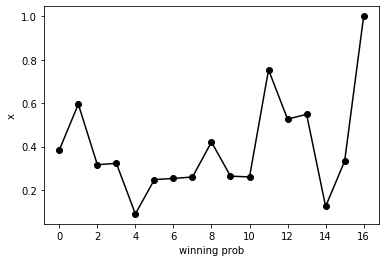

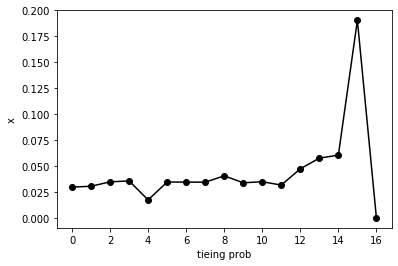

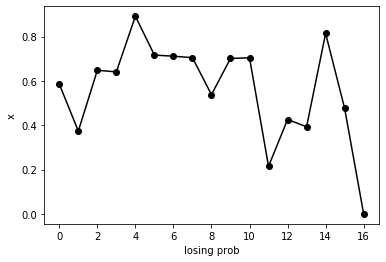

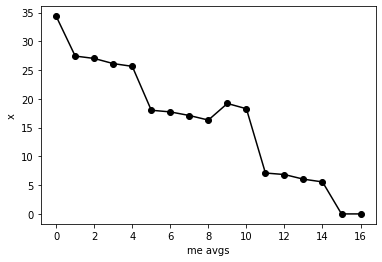

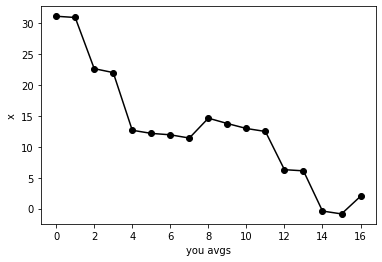

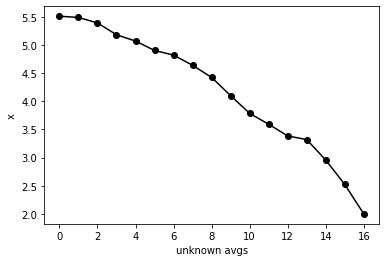

In [10]:
graph(turns,winning_probs,'winning prob')
graph(turns,tieing_probs,'tieing prob')
graph(turns,losing_probs,'losing prob')
graph(turns,avg_score_mes,'me avgs')
graph(turns,avg_score_yous,'you avgs')
graph(turns,unknown_avgs,'unknown avgs')